<a href="https://colab.research.google.com/github/keirkwame/axionEmu/blob/main/Open_access_of_2e5_emulator_NN_tt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import scipy.interpolate as spi
import tensorflow as tf

# setting the seed for reproducibility
with tf.device('/device:GPU:1'):
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    np.random.seed(2)
    tf.random.set_seed(4)

#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
with tf.device('/device:GPU:1'):
    model_parameters = ['h', 
                        'tau_reio', 
                        'omega_b', 
                        'n_s', 
                        'ln10A_s', 
                        'omega_cdm',
                        'log10ma',
                        'omega_ax',
                        'gamma_1',
                        'gamma_2'
                        ]

In [ ]:
np.linspace(0,28,15)

In [60]:
with tf.device('/device:GPU:1'):
    import pickle
    collection_list = []
    for i in np.linspace(0, 2, 3): #28,15):
        #f = open('/home/anran/axionCAMB/test_data_collect_9params_5e5_mp_test_'+str(int(i))+'.pkl', 'rb')
        f = open('/home/keir/Software/axionEmu/data_collection_axion/test_data_collect_HMcode_12params_6testmab_HMcode_'+str(int(i))+'.pkl', 'rb')
        collection = pickle.load(f)
        f.close()
        print(len(collection['C_phi']))
        collection_list.append(collection)

    import random
    #random.shuffle(collection_list)

2
2
2


In [ ]:
import pickle
for i in np.linspace(0,28,15):
    f = open('/home/anran/axionCAMB/test_data_collect_9params_5e5_mp_test_'+str(int(i)+30)+'.pkl', 'rb')
    collection = pickle.load(f)
    f.close()
    print(len(collection['C_tt']))
    collection_list.append(collection)
    
import random
random.shuffle(collection_list)

In [ ]:
print(len(collection_list[0]['params']['omega_b']))
print(len(collection_list))
print(collection_list[0]['params'].keys())
print(collection_list[0].keys())
print(collection_list[0]['l_index'][0])


In [61]:
with tf.device('/device:GPU:1'):
#import numpy as np
    parameters_list = {}
    for key in collection['params']:
        parameters_list[key] = np.array([])

    C_list = []
    C_phi_list = []
    PkL_list = []
    k_list = []
    kb_list = []
    z_list = []
    weyl_list = []

    for i in range(3):
        para = collection_list[i]['params']
        C_list.extend(collection_list[i]['PkNL'])
        C_phi_list.extend(collection_list[i]['C_phi'])
        PkL_list.extend(collection_list[i]['PkL'])
        k_list.extend(collection_list[i]['k_out'])
        kb_list.extend(collection_list[i]['k_out2'])
        z_list.extend(collection_list[i]['z_out'])
        weyl_list.extend(collection_list[i]['weyl'])
        for key in para:
          parameters_list[key] = np.concatenate((parameters_list[key], para[key]))

    ell_range = np.linspace(2,6000, 5999)

    print(parameters_list)

    '''spectra_= np.array(C_list)/1. #(7.4311*10**(12)) #/(ell_range*(ell_range+1)/(2.*np.pi))
    print(spectra_.shape)
    C_phi_list = np.array(C_phi_list)
    print(C_phi_list.shape)
    k_list = np.array(k_list)
    print(k_list.shape)
    kb_list = np.array(kb_list)
    print(kb_list.shape)
    z_list = np.array(z_list)
    print(z_list.shape)
    PkL_list = np.array(PkL_list)
    print(PkL_list.shape)
    weyl_list = np.array(weyl_list)
    print(weyl_list.shape)
    print(parameters_list)'''
    spectra_ = C_list

    #Remove nan spectra
    '''spectra_bool = np.array(np.sum(~np.isnan(spectra_), axis=1), dtype=bool)
    print(spectra_bool)
    spectra_ = spectra_[spectra_bool, :]
    for key in parameters_list.keys():
        parameters_list[key] = parameters_list[key][spectra_bool]
        print(parameters_list[key].shape)
    print(spectra_.shape)'''

    '''cut_off = 2 #65000 #108000
    import copy
    training_parameters_ = copy.deepcopy(parameters_list)
    h_0 = training_parameters_['H_0'][:cut_off]/100
    ln10_10A_s = np.log(training_parameters_['A_s'][:cut_off]*10**10)
    ma_mass = np.array(training_parameters_['ma'][:cut_off]*10**32,dtype='float64')
    ma_mass = np.log10(ma_mass)
    training_parameters = dict()
    training_parameters['omega_b'] = training_parameters_['omega_b'][:cut_off]
    training_parameters['omega_cdm'] = training_parameters_['omega_cdm'][:cut_off]
    training_parameters['h'] = h_0
    training_parameters['tau_reio'] = training_parameters_['tau_reio'][:cut_off]
    training_parameters['n_s'] = training_parameters_['n_s'][:cut_off]
    training_parameters['ln10A_s'] = ln10_10A_s
    training_parameters['log10ma'] = ma_mass
    training_parameters['omega_ax'] = training_parameters_['omega_ax'][:cut_off]
    training_parameters['gamma_1'] = training_parameters_['gamma_1'][:cut_off]
    training_parameters['gamma_2'] = training_parameters_['gamma_2'][:cut_off]

    test_parameters_ = copy.deepcopy(parameters_list)
    h_0 = test_parameters_['H_0'][cut_off:]/100
    ln10_10A_s = np.log(test_parameters_['A_s'][cut_off:]*10**10)
    ma_mass = np.array(test_parameters_['ma'][cut_off:]*10**32, dtype = 'float64')
    ma_mass = np.log10(ma_mass)
    test_parameters = dict()
    test_parameters['omega_b'] = test_parameters_['omega_b'][cut_off:]
    test_parameters['omega_cdm'] = test_parameters_['omega_cdm'][cut_off:]
    test_parameters['h'] = h_0
    test_parameters['tau_reio'] = test_parameters_['tau_reio'][cut_off:]
    test_parameters['n_s'] = test_parameters_['n_s'][cut_off:]
    test_parameters['ln10A_s'] = ln10_10A_s
    test_parameters['omega_ax'] = test_parameters_['omega_ax'][cut_off:]
    test_parameters['log10ma'] = ma_mass
    test_parameters['gamma_1'] = test_parameters_['gamma_1'][cut_off:]
    test_parameters['gamma_2'] = test_parameters_['gamma_2'][cut_off:]

    spectra_ = spectra_[:,:] #ell_range.shape[0]]/(ell_range*(ell_range+1)/(2.*np.pi))
    #training_log_spectra = np.log10(spectra_)[:cut_off,:]
    training_log_spectra = spectra_[:cut_off, :]
    testing_spectra = spectra_[cut_off:,:]
    print('number of training spectra: ', training_log_spectra.shape)
    print('number of testing spectra: ', testing_spectra.shape)'''


{'omega_b': array([0.022383, 0.022383, 0.022383, 0.022383, 0.022383, 0.022383]), 'omega_cdm': array([0.108099, 0.108099, 0.108099, 0.108099, 0.108099, 0.108099]), 'H_0': array([67.32, 67.32, 67.32, 67.32, 67.32, 67.32]), 'n_s': array([0.96605, 0.96605, 0.96605, 0.96605, 0.96605, 0.96605]), 'A_s': array([2.1e-09, 2.1e-09, 2.1e-09, 2.1e-09, 2.1e-09, 2.1e-09]), 'tau_reio': array([0.0543, 0.0543, 0.0543, 0.0543, 0.0543, 0.0543]), 'z': array([3.506, 2.51 , 4.004, 4.502, 5.   , 3.008]), 'ma': array([1.e-23, 1.e-27, 1.e-24, 1.e-26, 1.e-22, 1.e-25]), 'omega_ax': array([0.012011, 0.012011, 0.012011, 0.012011, 0.012011, 0.012011]), 'gamma_1': array([0., 0., 0., 0., 0., 0.]), 'gamma_2': array([0.37 , 0.   , 0.222, 0.148, 0.074, 0.296])}


Text(0, 0.5, 'Weyl transfer function')

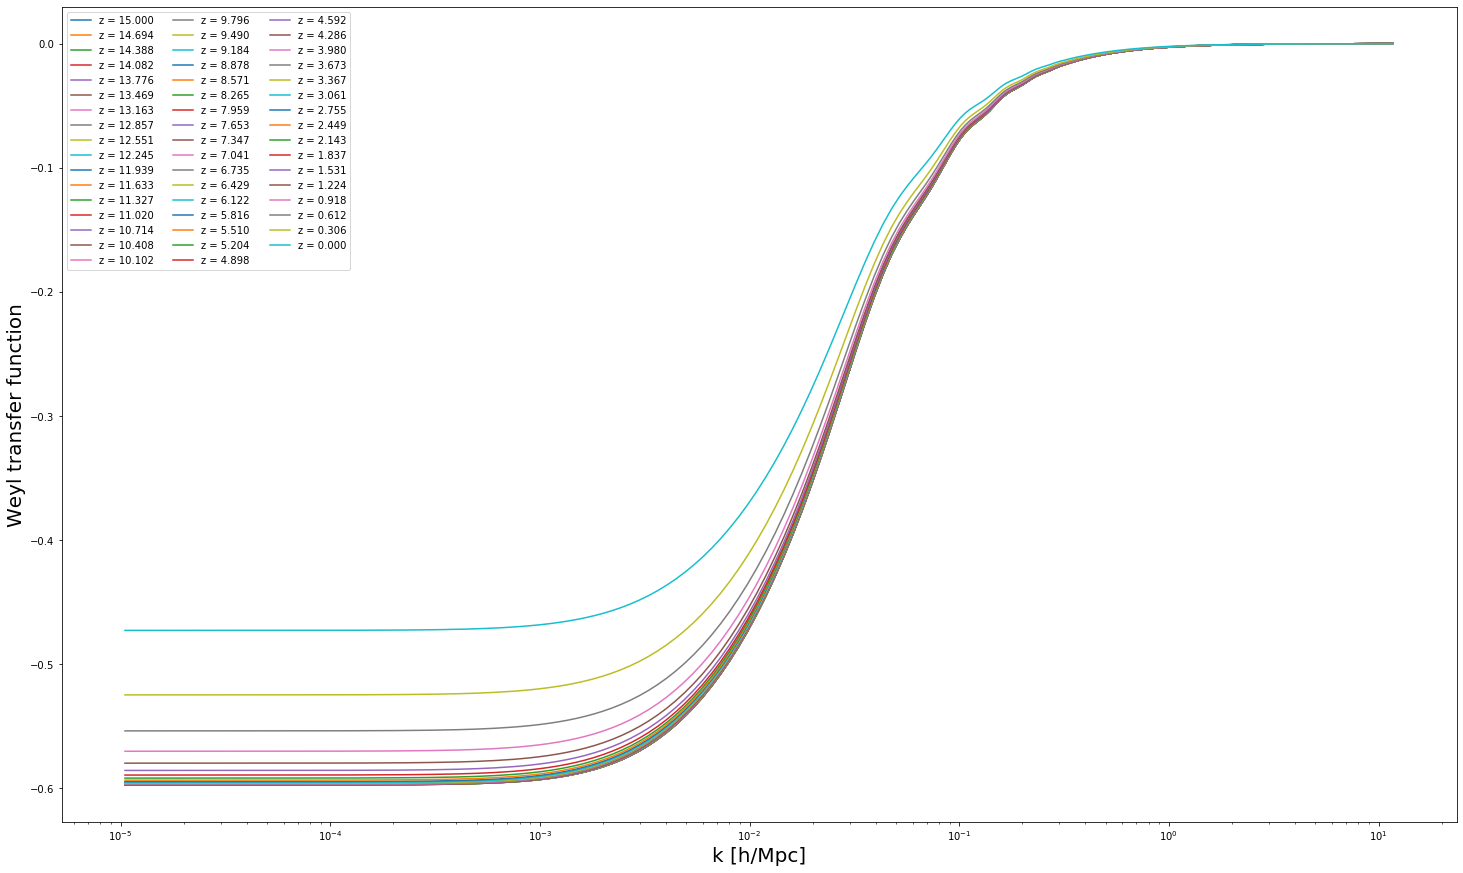

In [6]:
#Check Weyl potential files
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25., 15.))
k_camb = np.zeros((50, 257))
weyl_camb = np.zeros((50, 257))
for i in range(50):
    k_camb[i, :] = np.loadtxt('/home/keir/Software/axionEmu/data_collection_axion/test_4test_HMcode_0/test_4test_HMcode_0_0_transfer_%i.dat'%(i+1))[:, 0]
    weyl_camb[i, :] = np.loadtxt('/home/keir/Software/axionEmu/data_collection_axion/test_4test_HMcode_0/test_4test_HMcode_0_0_transfer_%i.dat'%(i+1))[:, -2]
    axes.plot(k_camb[i, :], weyl_camb[i, :], label='z = %.3f'%(z_list[:, ::-1][0, i]))
axes.legend(ncol=3)
axes.set_xscale('log')
axes.set_yscale('linear')
axes.set_xlabel('k [h/Mpc]', fontsize=20.)
axes.set_ylabel('Weyl transfer function', fontsize=20.)


Text(0, 0.5, 'Weyl transfer function [z = 0]')

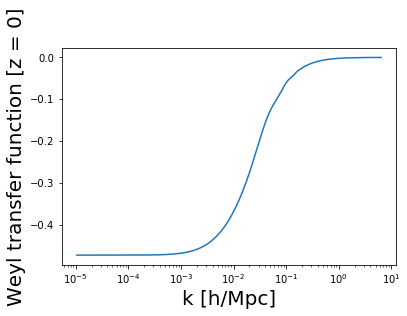

In [3]:
#Test Weyl potential
%matplotlib inline
transfer_test = np.loadtxt('/home/keir/Software/axionCAMB/test_lague_transfer_out.dat')
plt.plot(transfer_test[:, 0], transfer_test[:, -2])
plt.xscale('log')
plt.xlabel('k [h/Mpc]', fontsize=20.)
plt.ylabel('Weyl transfer function [z = 0]', fontsize=20.)


In [ ]:
print(weyl_camb)


In [ ]:
%matplotlib inline
plt.plot(ell_range, training_log_spectra[0] * ell_range * (ell_range + 1) / 2. / np.pi)
plt.plot(ell_range, training_log_spectra[-1] * ell_range * (ell_range + 1) / 2. / np.pi)


In [ ]:
%matplotlib inline
plt.plot(ell_range, (10. ** training_log_spectra[0]) * ell_range * (ell_range + 1) / 2. / np.pi)
plt.plot(ell_range, (10. ** training_log_spectra[-1]) * ell_range * (ell_range + 1) / 2. / np.pi)


In [ ]:
%matplotlib inline
plt.plot(ell_range, 10. ** training_log_spectra[0])
plt.plot(ell_range, (10. ** training_log_spectra[1]) * 1.)
plt.yscale('log')


[0.44778474 0.57631659 0.68025188 ... 0.00394667 0.00394565 0.00394463]
[0.44779153 0.57633195 0.68027661 ... 0.00400733 0.00400628 0.00400522]
[0.44784764 0.57645101 0.68046927 ... 0.00347153 0.00347055 0.00346958]
[0.37594357 0.4839817  0.57139761 ... 0.00201668 0.00201611 0.00201553]
[0.3758723  0.48382666 0.57111576 ... 0.00122927 0.00122892 0.00122857]
[0.37504385 0.48198876 0.5679524  ... 0.00096913 0.00096885 0.00096857]


Text(0, 0.5, 'C^{kk} / C^{kk}_{m = -22}')

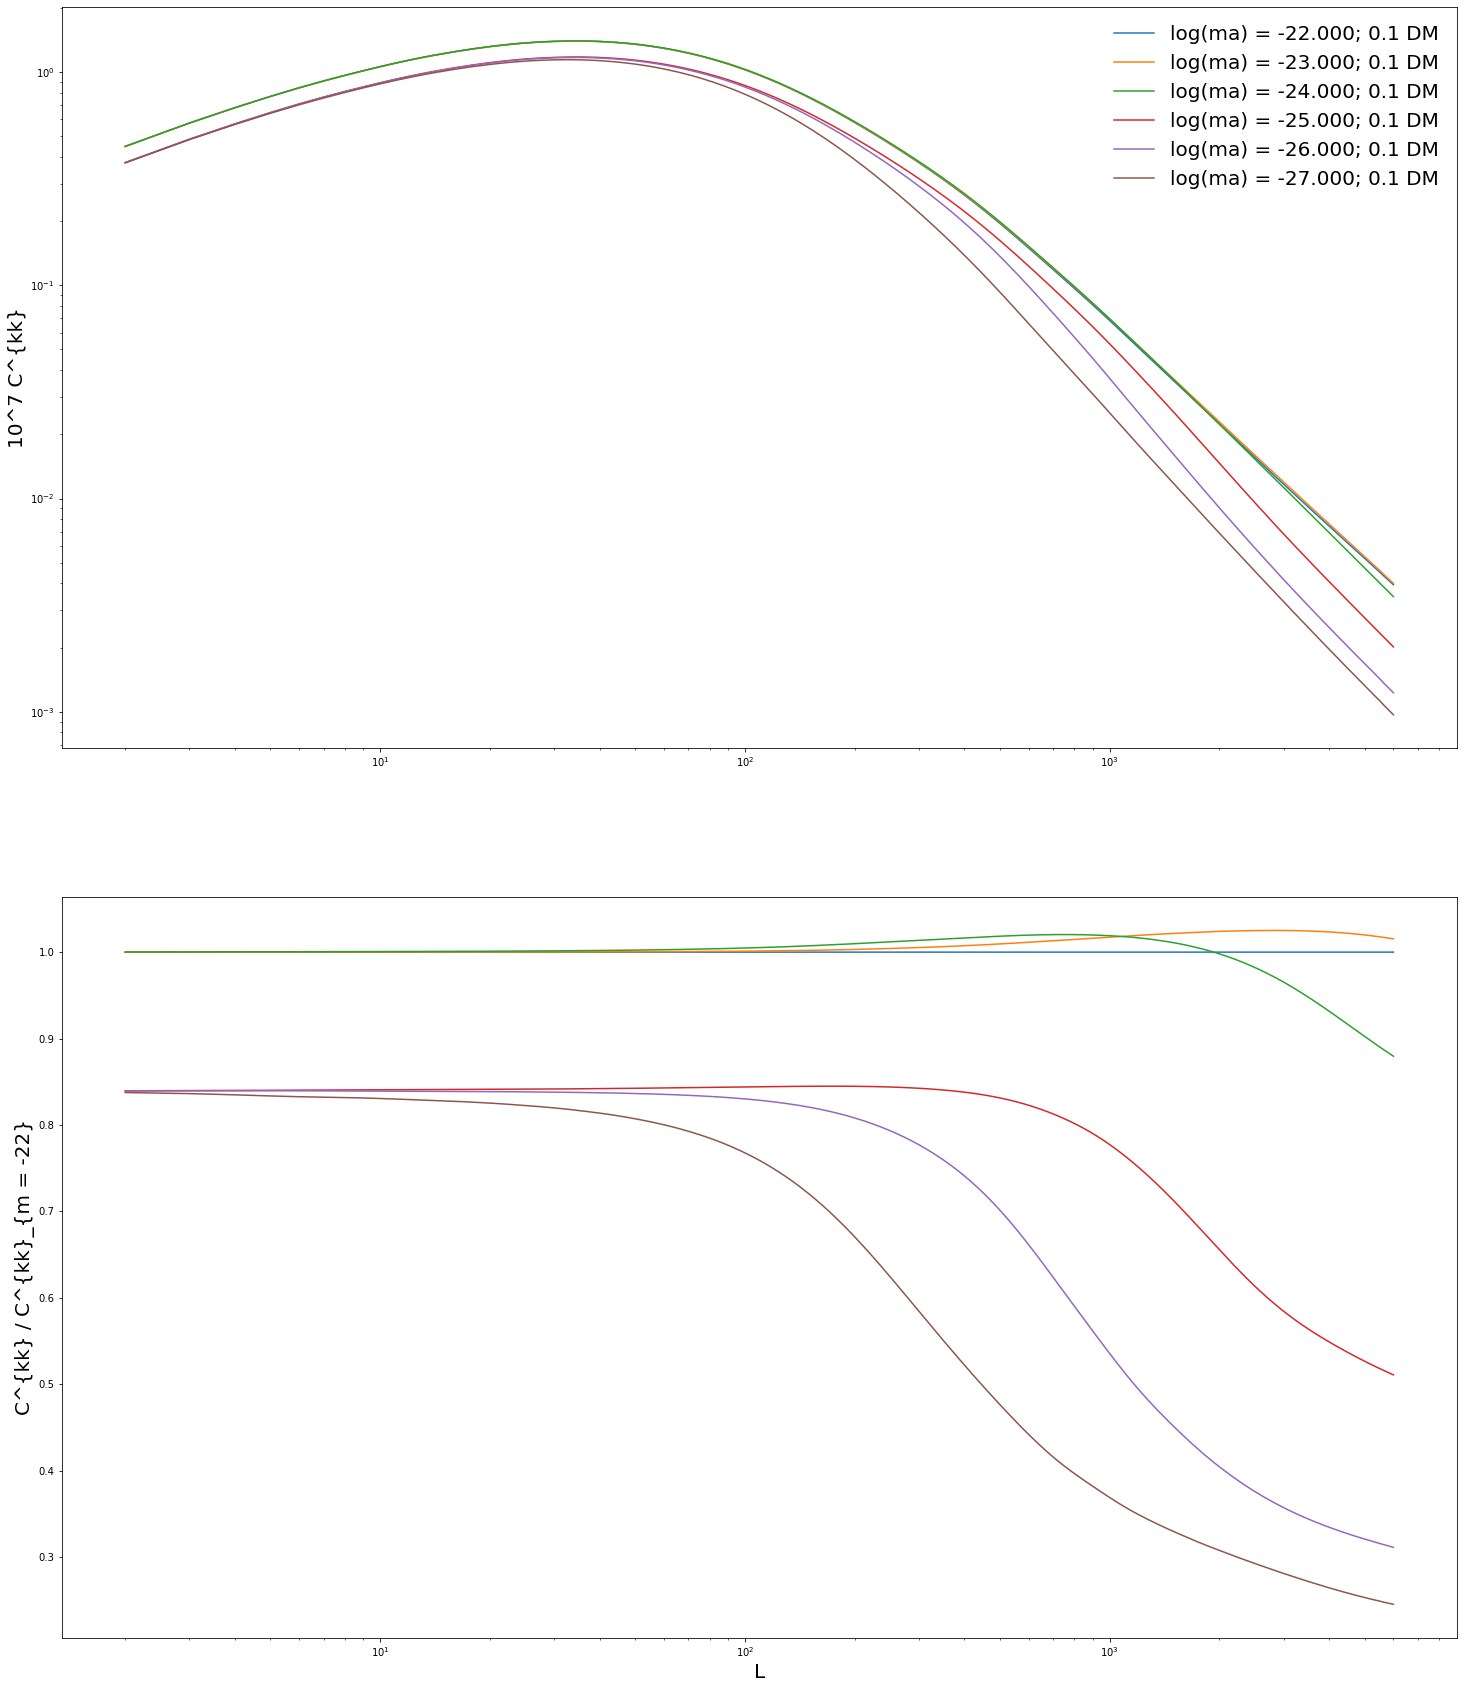

In [62]:
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(25., 30.))
for i in np.array([4, 0, 2, 5, 3, 1]):
    print(C_phi_list[i][:5999] * 1.e+7)
    axes[0].plot(ell_range, C_phi_list[i][:5999] * 1.e+7, label=r'log(ma) = %.3f; 0.1 DM'%np.log10(parameters_list['ma'][i]))
    axes[1].plot(ell_range, C_phi_list[i][:5999] / C_phi_list[4][:5999])
#plt.plot(ell_range, C_phi_list[1][:5999] * 1.e+7)
axes[0].set_xscale('log')
axes[1].set_xscale('log')
axes[0].set_yscale('log')
axes[0].legend(frameon=False, fontsize=20.)
axes[1].set_xlabel('L', fontsize=20.)
axes[0].set_ylabel('10^7 C^{kk}', fontsize=20.)
axes[1].set_ylabel('C^{kk} / C^{kk}_{m = -22}', fontsize=20.)


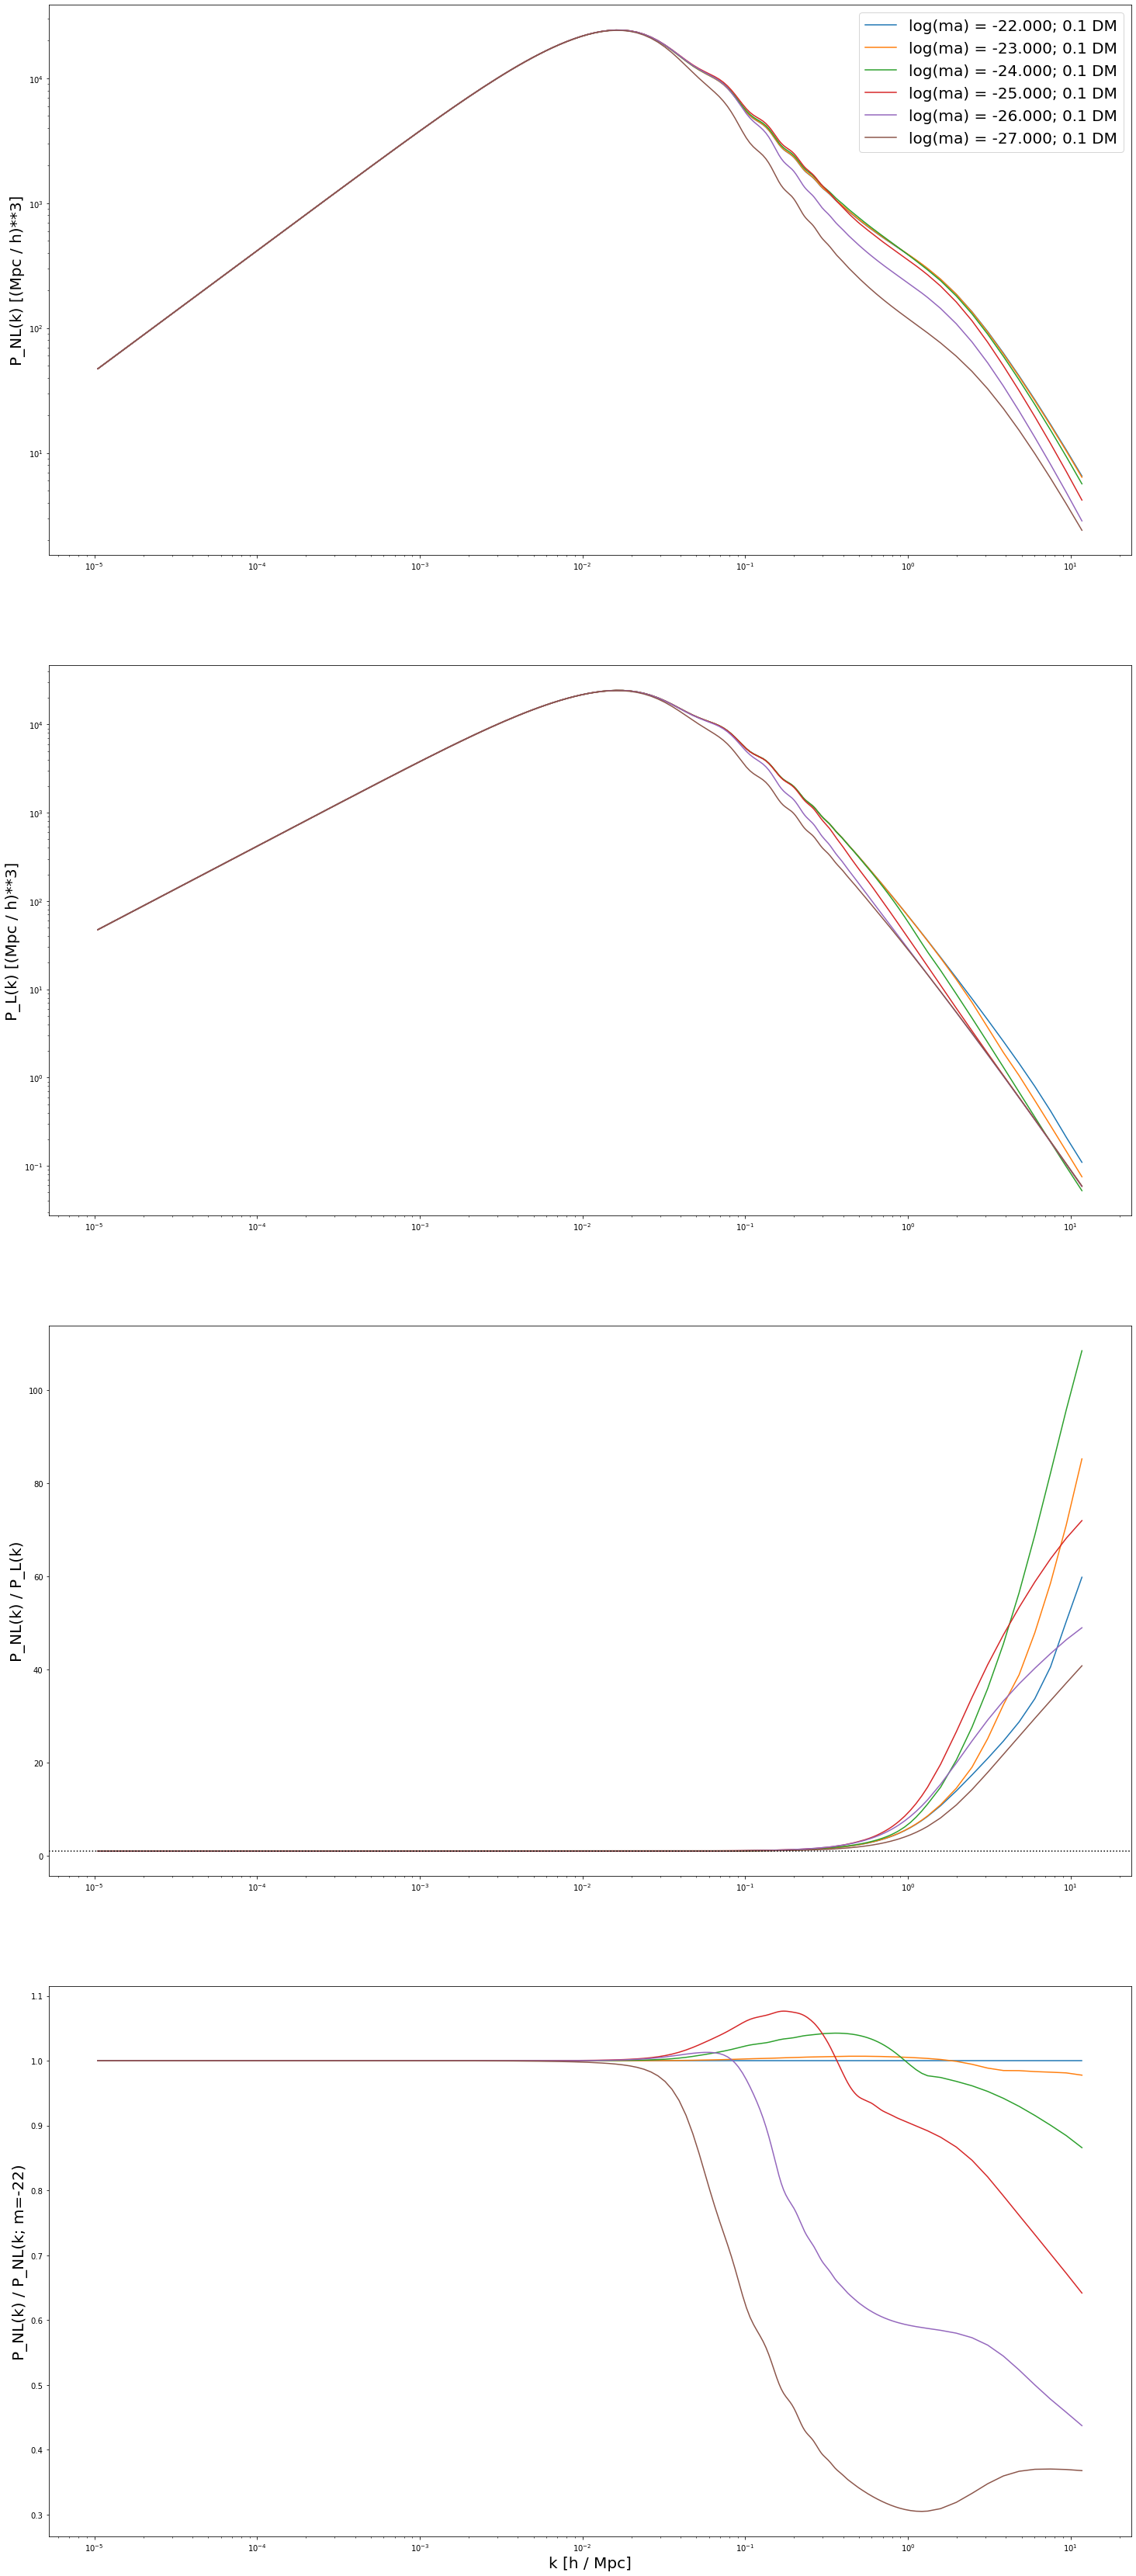

In [63]:
%matplotlib inline
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(25., 60.))
for i in np.array([4, 0, 2, 5, 3, 1]):
    PkNL_interpolated = spi.interp1d(np.log10(k_list[i][:]), np.log10(C_list[i][0, :]))
    axes[0].plot(k_list[i][:], C_list[i][0, :], label=r'log(ma) = %.3f; 0.1 DM'%np.log10(parameters_list['ma'][i])) #k_list[0, :],
    axes[1].plot(k_list[i][:], PkL_list[i][0, :])
    axes[2].plot(k_list[i][:], C_list[i][0, :] / PkL_list[i][0, :])
    axes[3].plot(k_list[4][:], (10. ** PkNL_interpolated(np.log10(k_list[4][:]))) / C_list[4][0, :])
#plt.plot(k_list[0, :], training_log_spectra[1]) #k_list[0, :],

axes[2].axhline(y=1., color='black', ls=':')

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[2].set_xscale('log')
axes[3].set_xscale('log')

axes[3].set_xlabel('k [h / Mpc]', fontsize=20.)
axes[0].set_ylabel('P_NL(k) [(Mpc / h)**3]', fontsize=20.)
axes[1].set_ylabel('P_L(k) [(Mpc / h)**3]', fontsize=20.)
axes[2].set_ylabel('P_NL(k) / P_L(k)', fontsize=20.)
axes[3].set_ylabel('P_NL(k) / P_NL(k; m=-22)', fontsize=20.)
axes[0].legend(ncol=1, fontsize=20.)


In [52]:
print(k_list[0], k_list[1], len(k_list[0]), len(k_list[1]))


[1.04965e-05 1.15900e-05 1.27975e-05 1.41308e-05 1.56031e-05 1.72287e-05
 1.90236e-05 2.10056e-05 2.31940e-05 2.56105e-05 2.82787e-05 3.12249e-05
 3.44781e-05 3.80702e-05 4.20365e-05 4.64160e-05 5.12519e-05 5.65915e-05
 6.24875e-05 6.89977e-05 7.61862e-05 8.41236e-05 9.28880e-05 1.02566e-04
 1.13251e-04 1.25050e-04 1.38079e-04 1.52464e-04 1.68349e-04 1.85888e-04
 2.05255e-04 2.26639e-04 2.50251e-04 2.76324e-04 3.05112e-04 3.36900e-04
 3.72000e-04 4.10757e-04 4.53551e-04 5.00804e-04 5.52980e-04 6.10592e-04
 6.74206e-04 7.44448e-04 8.22008e-04 9.07649e-04 1.00221e-03 1.10663e-03
 1.22192e-03 1.34923e-03 1.48979e-03 1.64501e-03 1.81639e-03 2.00563e-03
 2.21459e-03 2.44531e-03 2.70008e-03 2.98138e-03 3.29200e-03 3.63497e-03
 4.01368e-03 4.43184e-03 4.89357e-03 5.40341e-03 5.96636e-03 6.58796e-03
 7.27433e-03 8.03220e-03 8.86903e-03 9.79305e-03 1.08133e-02 1.19399e-02
 1.31839e-02 1.45574e-02 1.60741e-02 1.77488e-02 1.95979e-02 2.16397e-02
 2.38942e-02 2.63836e-02 2.91324e-02 3.21675e-02 3.

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25., 15.))
for i, z in enumerate(z_list[0]):
    axes.plot(k_list[0, :], weyl_list[0, i, :], label='z = %.3f'%z) #k_list[0, :],
    #axes[1].plot(k_list[0, :], PkL_list[0, i, :])
    #axes[2].plot(k_list[0, :], training_log_spectra[0, i, :] / PkL_list[0, i, :])
#plt.plot(k_list[0, :], training_log_spectra[1]) #k_list[0, :],

#axes[2].axhline(y=1., color='black', ls=':')

axes.set_xscale('log')
axes.set_yscale('log')
#axes[1].set_xscale('log')
#axes[1].set_yscale('log')
#axes[2].set_xscale('log')

axes.set_xlabel('k [h / Mpc]', fontsize=20.)
axes.set_ylabel('P_Weyl(k) [(Mpc / h)**3]', fontsize=20.)
#axes[1].set_ylabel('P_L(k) [(Mpc / h)**3]', fontsize=20.)
#axes[2].set_ylabel('P_NL(k) / P_L(k)', fontsize=20.)
axes.legend(ncol=3)


In [ ]:
print(weyl_list[0, 0, :])


In [ ]:
%matplotlib inline
plt.plot(k_list[0, :], training_log_spectra[0]) #k_list[0, :], 
plt.plot(k_list[0, :], training_log_spectra[1]) #k_list[0, :],
plt.xscale('log')
plt.yscale('log')


In [ ]:
print(k_list)
print(kb_list / 0.6732)


In [ ]:
with tf.device('/device:GPU:1'):
    test_collection = {}
    test_collection['training_parameters'] = training_parameters
    test_collection['test_parameters'] = test_parameters
    test_collection['training_log_spectra'] = training_log_spectra
    test_collection['testing_spectra'] = testing_spectra
    import pickle
    f = open('test_collection_C_tt_no_nan.pkl', 'wb')
    pickle.dump(test_collection, f)
    f.close()

In [ ]:
##Only for Google Colab
!git clone https://github.com/keirkwame/axionEmu.git

In [ ]:
# instantiate NN class
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    from axionEmu.cosmopower import cosmopower_NN
    cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=ell_range, 
                      n_hidden = [512, 512, 512,512], # 4 hidden layers, each with 512 nodes
                      verbose=True, # useful to understand the different steps in initialisation and training
                      )


In [ ]:
#import tensorflow as tf
with tf.device('/device:GPU:1'): # ensures we are running on a GPU
    # train
    cp_nn.train(training_parameters=training_parameters,
                training_features=training_log_spectra,
                filename_saved_model='TT_lensed_NL_NN_axion',
                # cooling schedule
                validation_split=0.1,
                learning_rates=[1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
                batch_sizes=[1024,1024,1024,1024,1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100],
                max_epochs = [1000,1000,1000,1000,1000],
                )


In [ ]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU:
    cp_nn = cosmopower_NN(restore=True, 
                          restore_filename='TT_lensed_NL_NN_axion',
                          )


In [ ]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU:
    predicted_testing_spectra = cp_nn.ten_to_predictions_np(test_parameters)
    import matplotlib.pyplot as plt
    from matplotlib import gridspec
    fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(50,30))
    for i in range(3):
        pred = predicted_testing_spectra[i]*ell_range*(ell_range+1)/(2.*np.pi)
        true = testing_spectra[i]*ell_range*(ell_range+1)/(2.*np.pi)
        ax[i].semilogx(ell_range, true, 'blue', label = 'Original')
        ax[i].semilogx(ell_range, pred, 'red', label = 'NN reconstructed', linestyle='--')
        ax[i].set_xlabel('$\ell$', fontsize='x-large')
        ax[i].set_ylabel('$C_\ell$', fontsize='x-large')
        ax[i].legend(fontsize=15)
    plt.savefig('examples_reconstruction_TT_lensed_axion_no_nan.pdf')


In [ ]:
print(np.sum(np.isnan(spectra_)) / np.size(spectra_))
print(parameters_list.keys())
for i in range(10000): #spectra_.shape[0]):
    if np.sum(np.isnan(spectra_[i])):
        plt.scatter(np.log10(parameters_list['ma'][i]), parameters_list['omega_ax'][i])


In [ ]:
print(np.sum(np.isnan(spectra_)) / np.size(spectra_))
print(parameters_list.keys())
plt.xlabel('log10ma')
plt.ylabel('omega-ax')
for i in range(1000): #spectra_.shape[0]):
    if not np.sum(np.isnan(spectra_[i])):
        plt.scatter(np.log10(parameters_list['ma'][i]), parameters_list['omega_ax'][i])


In [ ]:
#Remove nan spectra
spectra_bool = np.array(np.sum(np.isnan(spectra_), axis=1), dtype=bool)
print(spectra_bool)
print(np.sum(spectra_bool) / spectra_bool.size)
print(spectra_[0])
print(spectra_[1])


In [ ]:
##Only for Google Colab
!git clone https://github.com/simonsobs/so_noise_models

In [ ]:
with tf.device('/device:GPU:1'): # ensures we are running on a GPU:
    # load noise models from the SO noise repo
    '''noise_levels_load = np.loadtxt('./so_noise_models/LAT_comp_sep_noise/v3.1.0/SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt')
    conv_factor = (2.7255e6)**2

    ells = noise_levels_load[:, 0]
    SO_TT_noise = noise_levels_load[:, 1][:np.max(ell_range)+1-40] / conv_factor ##6001-40
    new_ells = ells[:np.max(ell_range)+1-40] ##6001-40

    f_sky = 0.4'''
    prefac = 1. #np.sqrt(2/(f_sky*(2*new_ells+1)))

    ##Cut off some spectra
    #print(new_ells)
    #print(prefac.shape, testing_spectra.shape, SO_TT_noise.shape)
    #testing_spectra = testing_spectra[:6001-40]

    denominator = prefac*testing_spectra[:, :]  # use all of them #+SO_TT_noise #38:
    diff = np.abs((predicted_testing_spectra[:, :] - testing_spectra[:, :])/(denominator))

    # Compute percentiles
    percentiles = np.zeros((4, diff.shape[1]))

    percentiles[0] = np.percentile(diff, 68, axis = 0)
    percentiles[1] = np.percentile(diff, 95, axis = 0)
    percentiles[2] = np.percentile(diff, 99, axis = 0)
    percentiles[3] = np.percentile(diff, 99.9, axis = 0)

    plt.figure(figsize=(12, 9))
    plt.fill_between(ell_range, 0, percentiles[2,:], color = 'salmon', label = '99%', alpha=0.8)
    plt.fill_between(ell_range, 0, percentiles[1,:], color = 'red', label = '95%', alpha = 0.7)
    plt.fill_between(ell_range, 0, percentiles[0,:], color = 'darkred', label = '68%', alpha = 1)

    # plt.ylim(0, 0.2)

    plt.legend(frameon=False, fontsize=30, loc='upper left')
    plt.ylabel(r'$\frac{| C_{\ell, \rm{emulated}}^{\rm{TT}} - C_{\ell, \rm{true}}^{\rm{TT}}|} {C_{\ell, \rm{CMB}}^{\rm{TT}}}$', fontsize=50)
    plt.xlabel(r'$\ell$',  fontsize=50)

    plt.axhline(y=0.01)
    #plt.axvline(x=np.log10(40))
    #plt.xscale('log')

    ax = plt.gca()
    ax.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    plt.setp(ax.get_xticklabels(), fontsize=25)
    plt.setp(ax.get_yticklabels(), fontsize=25)
    plt.tight_layout()
    plt.savefig('./accuracy_emu_TT_lensed_axion.pdf')

    diff_=np.sum(diff,axis = 1)
    print('diff_.shape is ', diff_.shape)
    sort_index = np.argsort(diff_)
    bad_params = dict()
    for key in test_parameters:
        bad_params[key] = []
    for i in sort_index[len(sort_index)-100:]:
        for key in test_parameters:
            bad_params[key].append(test_parameters[key][i])
    fig, ax = plt.subplots(nrows=1, ncols=8, figsize=(50,10))
    for i in range(8):
        pa =list(test_parameters.keys())[i]
        h = bad_params[pa]
        ax[i].plot(h, 'o')
        ax[i].set_ylabel(pa, fontsize='x-large')
    plt.savefig('bad_params_TT_lensed_axion.pdf')
